# ***Intrusion Detection System in Computer Networks Using Machine Learning***

---



---





# Import Relevant Modules 

In [1]:
! pip install pygam

  Using cached pygam-0.9.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached progressbar2-4.4.2-py3-none-any.whl.metadata (17 kB)
  Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached pygam-0.9.1-py3-none-any.whl (522 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
Using cached progressbar2-4.4.2-py3-none-any.whl (56 kB)
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.1 MB 6.4 MB/s eta 0:00:07
   ---------------------------------------- 0.2/44.1 MB 3.7 MB/s eta 0:00:12
   ---------------------------------------- 0.5/44.1 MB 4.5 MB/s eta 0:00:10
    --------------------------------------- 0.8/44.1 MB 4.8 MB/s eta 0:00:09
    --------------------------------------- 0.8/44.1 MB 3.8 MB/s eta 0:00:12
   - -------------------------------------- 1.2/44.1 MB 4.5 MB/s eta 0:00:10
   - ---------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install ipython-autotime

%load_ext autotime

^C
time: 0 ns (started: 2024-04-17 08:55:05 +05:30)


In [3]:
!pip install matplotlib mlxtend pandas numpy seaborn scikit-learn imbalanced-learn


^C
time: 2.05 s (started: 2024-04-17 08:55:12 +05:30)


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 3.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 3.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 3.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 3.7 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 3.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ----------------- ---------------------- 112.6/258.0 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 4.0 MB/s eta 0:00:00


In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

time: 4.95 s (started: 2024-04-17 08:56:51 +05:30)


In [6]:
import warnings
warnings.filterwarnings('ignore')

time: 0 ns (started: 2024-04-17 08:57:05 +05:30)


In [7]:
# Libraries

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 1.5.3
numpy : 1.26.4
matplotlib : 3.7.0
seaborn : 0.12.2
sklearn : 1.4.0
imblearn : 0.12.2
time: 0 ns (started: 2024-04-17 08:57:10 +05:30)


# Loading Training And Testing Data

In [8]:
# Dataset field names

field_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

print (len(field_names))

43
time: 0 ns (started: 2024-04-17 08:57:16 +05:30)


In [9]:
# Loading Train Dataset
train_data = pd.read_table("Train.txt", sep=",", names=field_names)
# Removes an unwanted extra field
train_data = train_data.iloc[:,:-1] 

# Loading Test Dataset
test_data = pd.read_table("Test.txt", sep=",", names=field_names)
# Removes an unwanted extra field
test_data = test_data.iloc[:,:-1]

time: 390 ms (started: 2024-04-17 08:57:27 +05:30)


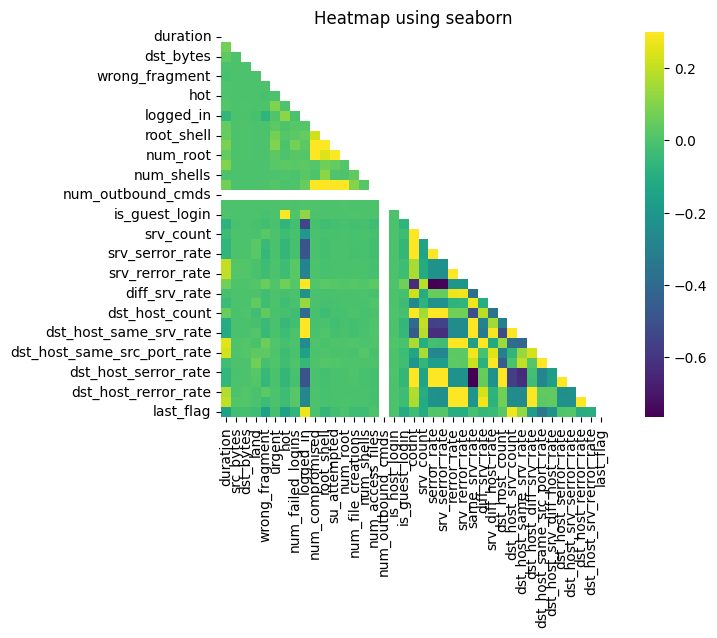

time: 1.12 s (started: 2024-04-17 08:57:37 +05:30)


In [10]:
data = pd.read_table("Train.txt", sep=",", names=field_names)
# print(data.dtypes)
# Select only numeric columns for correlation
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numeric_columns]

# Compute correlation matrix
corr = data_numeric.corr()


# corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (10, 5))

ax = sns.heatmap(corr, 
                 mask = mask, 
                 vmax = 0.3, 
                 square = True,  
                 cmap = "viridis")

ax.set_title("Heatmap using seaborn");

# Preview of Training And Testing Data

In [11]:
# Preview of Training Data
train_data.head(4)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   

   dst_host_srv_rerror_rate   attack  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  neptune  
3                      0.01   normal  

[4 rows x 42 columns]

time: 94 ms (started: 2024-04-17 08:57:46 +05:30)


In [12]:
# Set Dimensions For Training Data
print('Train set dimension: {} rows, {} columns'.format(train_data.shape[0], train_data.shape[1]))

Train set dimension: 125973 rows, 42 columns
time: 0 ns (started: 2024-04-17 08:57:52 +05:30)


In [13]:
# Preview of Testing Data
test_data.head(4)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   1.0   
1                   0.0                       0.0                   1.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate   attack  
0                       1.0  neptune  
1                       1.0  neptune  
2                       0.0   normal  
3                       0.0    saint  

[4 rows x 42 columns]

time: 15 ms (started: 2024-04-17 08:58:00 +05:30)


In [14]:
# Set Dimensions For Training Data
print('Test set dimension: {} rows, {} columns'.format(test_data.shape[0], test_data.shape[1]))

Test set dimension: 22544 rows, 42 columns
time: 0 ns (started: 2024-04-17 08:58:05 +05:30)


# Data Preprocessing

Mapping Different Attacks into 4 Major Attack Classes:

1.   Denial of Service (DoS)
2.   Probing Attack (Probe)
3.   User to Root Attack (U2R)
4.   Remote to Local Attack (R2L)



In [15]:
map = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

time: 0 ns (started: 2024-04-17 08:59:44 +05:30)


In [16]:
# Apply attack class mappings to the dataset
train_data['attack_class'] = train_data['attack'].apply(lambda v: map[v])
test_data['attack_class'] = test_data['attack'].apply(lambda v: map[v])

time: 31 ms (started: 2024-04-17 09:00:35 +05:30)


In [17]:
# Drop attack field from both train and test data
train_data.drop(['attack'], axis=1, inplace=True)
test_data.drop(['attack'], axis=1, inplace=True)

time: 31 ms (started: 2024-04-17 09:00:38 +05:30)


In [18]:
# Preview of top 4 Train Data 
train_data.head(4)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   

   dst_host_srv_rerror_rate  attack_class  
0                      0.00        Normal  
1                      0.00        Normal  
2                      0.00           DoS  
3                      0.01        Normal  

[4 rows x 42 columns]

time: 0 ns (started: 2024-04-17 09:00:42 +05:30)


In [19]:
# Descriptive statistics
da = train_data.describe()
da

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  125973.000000    125973.000000  ...   125973.000000   
mean        0.395736         0.279250  ...      182.148945   
std         0.489010        23.942042  ...       99.206213   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...       82.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         1.000000         0.000000  ...      255.000000   
max         1.000000      7479.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       125973.000000           125973.000000           125973.000000   
mean           115.653005                0.521242                0.082951   
std            110.702741                0.448949                0.188922   
min              0.000000                0.000000                0.000000   
25%             10.000000                0.050000                0.000000   
50%             63.000000                0.510000                0.020000   
75%            255.000000                1.000000                0.070000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             125973.000000  
mean                   0.120240  
std                    0.319459  
min                    0.000000  
25%       

time: 172 ms (started: 2024-04-16 18:10:05 +05:30)


In [20]:
train_data['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    125973
Name: count, dtype: int64

time: 0 ns (started: 2024-04-16 18:10:08 +05:30)


In [21]:
test_data['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22544
Name: count, dtype: int64

time: 15 ms (started: 2024-04-16 18:10:11 +05:30)


In [19]:
train_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

time: 15 ms (started: 2024-04-17 09:01:46 +05:30)


In [20]:
test_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

time: 0 ns (started: 2024-04-17 09:01:50 +05:30)


In [21]:
# Attack Class Distribution
atk_train = train_data[['attack_class']].apply(lambda x: x.value_counts())
atk_test = test_data[['attack_class']].apply(lambda x: x.value_counts())
atk_train['frequency_train_percent'] = round((100 * atk_train / atk_train.sum()),2)
atk_test['frequency_test_percent'] = round((100 * atk_test / atk_test.sum()),2)

atk_dist = pd.concat([atk_train,atk_test], axis=1) 
atk_dist

attack_class  frequency_train_percent  attack_class  \
Normal         67343                    53.46          9711   
DoS            45927                    36.46          7458   
Probe          11656                     9.25          2421   
R2L              995                     0.79          2754   
U2R               52                     0.04           200   

        frequency_test_percent  
Normal                   43.08  
DoS                      33.08  
Probe                    10.74  
R2L                      12.22  
U2R                       0.89

time: 32 ms (started: 2024-04-17 09:02:49 +05:30)


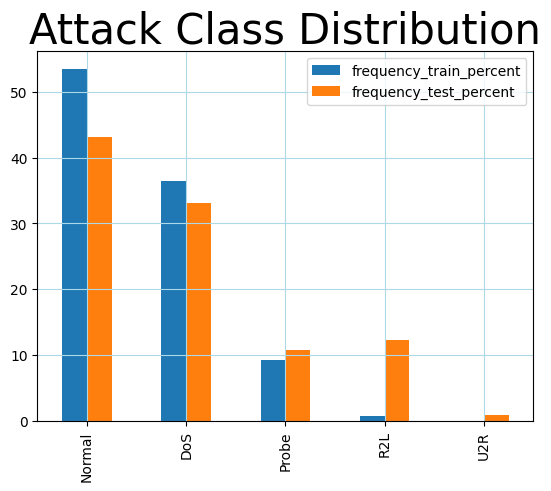

time: 172 ms (started: 2024-04-17 09:03:00 +05:30)


In [22]:
# Attack class bar plot
plot = atk_dist[['frequency_train_percent', 'frequency_test_percent']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=30)
plot.grid(color='lightblue', alpha=1.0)

In [23]:
train_data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_class  
0                      0.00        Normal  
1                      0.00        Normal  
2                      0.00           DoS  
3                      0.01        Normal  
4                      0.00        Normal  

[5 rows x 41 columns]

time: 15 ms (started: 2024-04-17 09:03:05 +05:30)


In [24]:
# Scaling numerical Attributes

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# extract numerical attributes from data and scale it to have zero mean and unit variance  
clmns = train_data.select_dtypes(include=['float64','int64']).columns
scaler_train = std_scaler.fit_transform(train_data.select_dtypes(include=['float64','int64']))
scaler_test = std_scaler.fit_transform(test_data.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
scaler_train_frame = pd.DataFrame(scaler_train, columns = clmns)
scaler_test_frame = pd.DataFrame(scaler_test, columns = clmns)

time: 141 ms (started: 2024-04-17 09:03:26 +05:30)


In [25]:
# Encoding of Categorical Attributes

from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()

# extracting the categorical attributes from both training and testing  datasets 
categorical_train = train_data.select_dtypes(include=['object']).copy()
categorical_test = test_data.select_dtypes(include=['object']).copy()

# encoding the categorical attributes
train_categorical = categorical_train.apply(l_encoder.fit_transform)
test_categorical = categorical_test.apply(l_encoder.fit_transform)

# separating target column from encoded data 
encode_train = train_categorical.drop(['attack_class'], axis=1)
encode_test = test_categorical.drop(['attack_class'], axis=1)

categorical_Ytrain = train_categorical[['attack_class']].copy()
categorical_Ytest = test_categorical[['attack_class']].copy()

time: 94 ms (started: 2024-04-17 09:04:06 +05:30)


In [26]:
# # Data Sampling

# from imblearn.over_sampling import RandomOverSampler 
# from collections import Counter

# # defining columns and extracting encoded train dataset for sampling 
# scaler_train_frame = train_data.select_dtypes(include=['float64','int64'])
# ref_class_column = pd.concat([scaler_train_frame, encode_train], axis=1).columns
# ref_class = np.concatenate((scaler_train, encode_train.values), axis=1)
# X = ref_class

# # reshaping target column to 1D array shape  
# c, r = categorical_Ytest.values.shape
# y_test = categorical_Ytest.values.reshape(c,)

# c, r = categorical_Ytrain.values.shape
# y = categorical_Ytrain.values.reshape(c,)

# # applying the random over-sampling
# sampling = RandomOverSampler(random_state=42)
# X_res, y_res = sampling.fit_sample(X, y)
# print('Original dataset shape {}'.format(Counter(y)))
# print('Resampled dataset shape {}'.format(Counter(y_res)))

# Data Sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# defining columns and extracting encoded train dataset for sampling 
scaler_train_frame = train_data.select_dtypes(include=['float64', 'int64'])
ref_class_column = pd.concat([scaler_train_frame, encode_train], axis=1).columns
ref_class = np.concatenate((scaler_train_frame.values, encode_train.values), axis=1)
X = ref_class

# reshaping target column to 1D array shape  
y_train = categorical_Ytrain.values.ravel()  # Use ravel() to flatten into 1D array
y_test = categorical_Ytest.values.ravel()

# applying the random over-sampling
sampling = RandomOverSampler(random_state=42)
X_res, y_res = sampling.fit_resample(X, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_res))


Original dataset shape: Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape: Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})
time: 281 ms (started: 2024-04-17 09:04:21 +05:30)


In [33]:
X.shape


(125973, 40)

time: 0 ns (started: 2024-04-17 09:18:14 +05:30)


# Feature Selection Using RandomForest Classifier Model 

In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

# fitting random forest classifier on the training set
random_forest.fit(X_res, y_res)
# extracting important features
scoring = np.round(random_forest.feature_importances_,3)
important = pd.DataFrame({'feature':ref_class_column,'importance':scoring})
important = important.sort_values('importance',ascending=False).set_index('feature')
# plotting important features in bar graph
# plt.rcParams['figure.figsize'] = (15, 5)
# important.plot.bar()

time: 21.6 s (started: 2024-04-17 09:07:32 +05:30)


In [34]:
from sklearn.feature_selection import RFE
import itertools
random_forest = RandomForestClassifier()

# creating the RFE model and selecting 10 attributes
random_feature = RFE(random_forest, n_features_to_select=10)
random_forest = random_feature.fit(X_res, y_res)

# summarizing the selection of the attributes
feature_mapping = [(j, w) for j, w in itertools.zip_longest(random_feature.get_support(), ref_class_column)]
features = [w for j, w in feature_mapping if j==True]

time: 10min 24s (started: 2024-04-17 09:19:05 +05:30)


In [35]:
features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']

time: 0 ns (started: 2024-04-17 09:30:12 +05:30)


# Dataset Partition

In [36]:
# defining columns to a new dataframe
new_column = list(ref_class_column)
new_column.append('attack_class')

# adding a dimension to target
new_y_res = y_res[:, np.newaxis]

# creating a dataframe from sampled data
res_array = np.concatenate((X_res, new_y_res), axis=1)
res_data_frame = pd.DataFrame(res_array, columns = new_column) 

# creating test dataframe
test_ref = pd.concat([scaler_test_frame, test_categorical], axis=1)
test_ref['attack_class'] = test_ref['attack_class'].astype(np.float64)
test_ref['protocol_type'] = test_ref['protocol_type'].astype(np.float64)
test_ref['flag'] = test_ref['flag'].astype(np.float64)
test_ref['service'] = test_ref['service'].astype(np.float64)

res_data_frame.shape


(336715, 41)

time: 31 ms (started: 2024-04-17 09:30:20 +05:30)


In [37]:
test_ref.shape

(22544, 41)

time: 0 ns (started: 2024-04-17 09:30:25 +05:30)


In [38]:
from collections import defaultdict
class_dict = defaultdict(list)

# creating two-target classes: normal class and an attack class
atk_list = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
nrml_class = [('Normal', 1.0)]

def create_class_dict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for i, l in nrml_class: 
        for j, w in atk_list: 
            res_train_set = res_data_frame.loc[(res_data_frame['attack_class'] == l) | (res_data_frame['attack_class'] == w)]
            class_dict[i +'_' + j].append(res_train_set)
            # test labels
            ref_test_set = test_ref.loc[(test_ref['attack_class'] == l) | (test_ref['attack_class'] == w)]
            class_dict[i +'_' + j].append(ref_test_set)
        
create_class_dict()

time: 125 ms (started: 2024-04-17 09:30:30 +05:30)


In [39]:
pre_train = class_dict['Normal_DoS'][0]
pre_test = class_dict['Normal_DoS'][0]
group_class = 'Normal_DoS'

time: 0 ns (started: 2024-04-17 09:30:35 +05:30)


In [40]:
# Finalizing data preprocessing for training

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

X_res_data_frame = pre_train 
new_test = pre_test

X_res_data_frame_new = X_res_data_frame[features]
X_res_data_frame_num = X_res_data_frame_new.drop(['service'], axis=1)
X_res_data_frame_cat = X_res_data_frame_new[['service']].copy()

X_test_features = new_test[features]
X_test_data_frame_num = X_test_features.drop(['service'], axis=1)
X_test_cat = X_test_features[['service']].copy()

# Fitting training data
one_hot_encoder.fit(X_res_data_frame_cat)

# Transforming training data
X_train_one_hotencoder = one_hot_encoder.transform(X_res_data_frame_cat).toarray()
       
# Transforming testing data
X_test_one_hotencoder = one_hot_encoder.transform(X_test_cat).toarray()

X_train_dataframe = np.concatenate((X_res_data_frame_num.values, X_train_one_hotencoder), axis=1)
X_test_dataframe = np.concatenate((X_test_data_frame_num.values, X_test_one_hotencoder), axis=1) 

y_train_dataframe = X_res_data_frame[['attack_class']].copy()
c, r = y_train_dataframe.values.shape
Y_train_dataframe = y_train_dataframe.values.reshape(c,)

y_test_dataframe = new_test[['attack_class']].copy()
c, r = y_test_dataframe.values.shape
Y_test_dataframe = y_test_dataframe.values.reshape(c,)


time: 141 ms (started: 2024-04-17 09:30:42 +05:30)


In [41]:
X_train_dataframe.shape

(134686, 74)

time: 0 ns (started: 2024-04-17 09:31:39 +05:30)


# Training Using pyGAM And Different Classifier Models



In [42]:
from pygam import LogisticGAM
import time
# Logistic GAM
Logistic_gam = LogisticGAM()
Logistic_gam.fit(X_train_dataframe, Y_train_dataframe)


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + s(73) + intercept,
   tol=0.0001, verbose=False)

time: 19min 35s (started: 2024-04-17 09:31:48 +05:30)


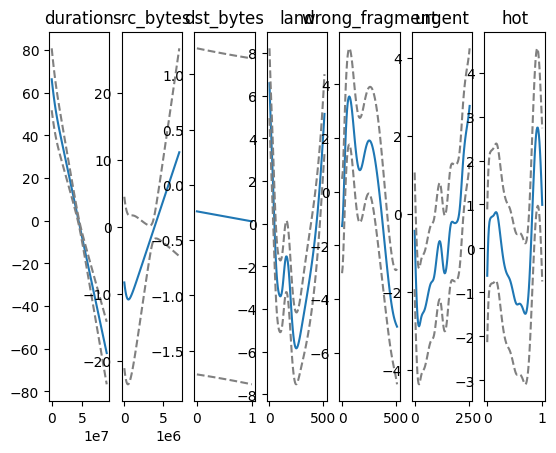

time: 1.44 s (started: 2024-04-17 09:51:38 +05:30)


In [43]:
fig, axs = plt.subplots(1, 7)
titles = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']

for i, w in enumerate(axs):
    u = Logistic_gam.generate_X_grid(term=i)
    pdep, confi = Logistic_gam.partial_dependence(term=i, width=.95)

    w.plot(u[:, i], pdep)
    w.plot(u[:, i], confi, c='grey', ls='--')
    w.set_title(titles[i])

In [44]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

time: 16 ms (started: 2024-04-17 09:51:45 +05:30)


In [45]:
# Train KNeighbors Classifier Model

KNeighbors_Classifier = KNeighborsClassifier(n_jobs=-1)
KNeighbors_Classifier.fit(X_train_dataframe, Y_train_dataframe); 

time: 109 ms (started: 2024-04-17 09:52:01 +05:30)


In [46]:
# Train Gaussian Naive Baye Model

Naive_Baye_Classifier = BernoulliNB()
Naive_Baye_Classifier.fit(X_train_dataframe, Y_train_dataframe)

BernoulliNB()

time: 110 ms (started: 2024-04-17 09:52:06 +05:30)


In [43]:
# # Train Support Vector Machine Model

# Support_vector_Classifier = SVC(random_state=0)
# Support_vector_Classifier.fit(X_train_dataframe, Y_train_dataframe)

SVC(random_state=0)

time: 49min 44s (started: 2024-04-16 18:45:38 +05:30)


In [47]:
# Train RandomForestClassifier Model

Random_Forest_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
Random_Forest_Classifier.fit(X_train_dataframe, Y_train_dataframe); 

time: 3.7 s (started: 2024-04-17 09:52:15 +05:30)


In [48]:
# Train Combined Models 1

model1 = [('Random Forest Classifier', Random_Forest_Classifier), ('KNN Classifier', KNeighbors_Classifier)]
model_1 = VotingClassifier(estimators = model1,voting = 'soft', n_jobs=-1)
model_1.fit(X_train_dataframe, Y_train_dataframe)

VotingClassifier(estimators=[('Random Forest Classifier',
                              RandomForestClassifier(criterion='entropy',
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('KNN Classifier',
                              KNeighborsClassifier(n_jobs=-1))],
                 n_jobs=-1, voting='soft')

time: 9.34 s (started: 2024-04-17 09:52:24 +05:30)


In [49]:
# Train Combined Models 2

model2 = [('Random Forest Classifier', Random_Forest_Classifier), ('Gaussian Naive Baye Classifier', Naive_Baye_Classifier)]
model_2 = VotingClassifier(estimators = model2,voting = 'soft', n_jobs=-1)
model_2.fit(X_train_dataframe, Y_train_dataframe)

VotingClassifier(estimators=[('Random Forest Classifier',
                              RandomForestClassifier(criterion='entropy',
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('Gaussian Naive Baye Classifier', BernoulliNB())],
                 n_jobs=-1, voting='soft')

time: 4.42 s (started: 2024-04-17 09:52:42 +05:30)


# AUC-ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


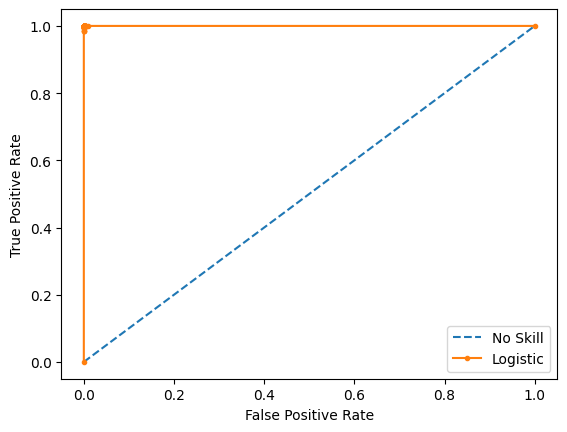

time: 48.9 s (started: 2024-04-17 09:53:31 +05:30)


In [50]:
# ROC curve for Random Forest Classifier and KNN Classifier


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probability1 = [0 for _ in range(len(Y_test_dataframe))]

probability2 = model_1.predict_proba(X_test_dataframe)
probability2 = probability2[:, 1]

auc1 = roc_auc_score(Y_test_dataframe, probability1)
auc2 = roc_auc_score(Y_test_dataframe, probability2)

print('No Skill: ROC AUC=%.3f' % (auc1))
print('Logistic: ROC AUC=%.3f' % (auc2))

f_probability_1, t_probability_1, _ = roc_curve(Y_test_dataframe, probability1)
f_probability_2, t_probability_2, _ = roc_curve(Y_test_dataframe, probability2)

pyplot.plot(f_probability_1, t_probability_1, linestyle='--', label='No Skill')
pyplot.plot(f_probability_2, t_probability_2, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


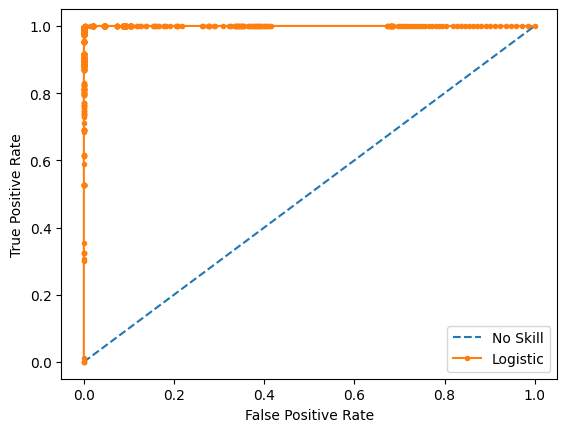

time: 500 ms (started: 2024-04-17 09:54:29 +05:30)


In [51]:
# ROC curve for Random Forest Classifier and Naive Baye Classifier


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probability1 = [0 for _ in range(len(Y_test_dataframe))]

probability2 = model_2.predict_proba(X_test_dataframe)
probability2 = probability2[:, 1]

auc1 = roc_auc_score(Y_test_dataframe, probability1)
auc2 = roc_auc_score(Y_test_dataframe, probability2)

print('No Skill: ROC AUC=%.3f' % (auc1))
print('Logistic: ROC AUC=%.3f' % (auc2))

f_probability_1, t_probability_1, _ = roc_curve(Y_test_dataframe, probability1)
f_probability_2, t_probability_2, _ = roc_curve(Y_test_dataframe, probability2)

pyplot.plot(f_probability_1, t_probability_1, linestyle='--', label='No Skill')
pyplot.plot(f_probability_2, t_probability_2, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


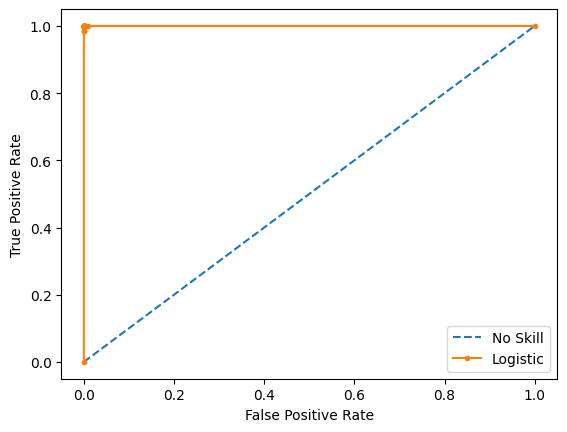

time: 406 ms (started: 2024-04-17 09:55:44 +05:30)


In [53]:
# ROC curve for Random Forest Classifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probability1 = [0 for _ in range(len(Y_test_dataframe))]

probability2 = Random_Forest_Classifier.predict_proba(X_test_dataframe)
probability2 = probability2[:, 1]

auc1 = roc_auc_score(Y_test_dataframe, probability1)
auc2 = roc_auc_score(Y_test_dataframe, probability2)

print('No Skill: ROC AUC=%.3f' % (auc1))
print('Logistic: ROC AUC=%.3f' % (auc2))

f_probability_1, t_probability_1, _ = roc_curve(Y_test_dataframe, probability1)
f_probability_2, t_probability_2, _ = roc_curve(Y_test_dataframe, probability2)

pyplot.plot(f_probability_1, t_probability_1, linestyle='--', label='No Skill')
pyplot.plot(f_probability_2, t_probability_2, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()


In [14]:
# # ROC curve for SVM Classifier

# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from matplotlib import pyplot
# from sklearn.calibration import CalibratedClassifierCV

# probability1 = [0 for _ in range(len(Y_test_dataframe))]

# model_svc = SVC(random_state=0)
# model = CalibratedClassifierCV(model_svc)
# model.fit(X_train_dataframe, Y_train_dataframe)

# probability2 = model.predict_proba(X_test_dataframe)
# probability2 = probability2[:, 1]

# auc1 = roc_auc_score(Y_test_dataframe, probability1)
# auc2 = roc_auc_score(Y_test_dataframe, probability2)

# print('No Skill: ROC AUC=%.3f' % (auc1))
# print('Logistic: ROC AUC=%.3f' % (auc2))

# f_probability_1, t_probability_1, _ = roc_curve(Y_test_dataframe, probability1)
# f_probability_2, t_probability_2, _ = roc_curve(Y_test_dataframe, probability2)

# pyplot.plot(f_probability_1, t_probability_1, linestyle='--', label='No Skill')
# pyplot.plot(f_probability_2, t_probability_2, marker='.', label='Logistic')

# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')

# pyplot.legend()
# pyplot.show()





NameError: name 'Y_test_dataframe' is not defined

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.985


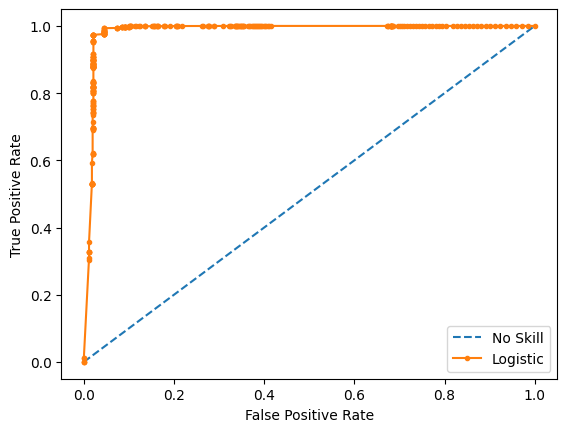

time: 312 ms (started: 2024-04-17 09:55:52 +05:30)


In [54]:
# ROC curve for Naive Baye Classifier



from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probability1 = [0 for _ in range(len(Y_test_dataframe))]

probability2 = Naive_Baye_Classifier.predict_proba(X_test_dataframe)
probability2 = probability2[:, 1]

auc1 = roc_auc_score(Y_test_dataframe, probability1)
auc2 = roc_auc_score(Y_test_dataframe, probability2)

print('No Skill: ROC AUC=%.3f' % (auc1))
print('Logistic: ROC AUC=%.3f' % (auc2))

f_probability_1, t_probability_1, _ = roc_curve(Y_test_dataframe, probability1)
f_probability_2, t_probability_2, _ = roc_curve(Y_test_dataframe, probability2)

pyplot.plot(f_probability_1, t_probability_1, linestyle='--', label='No Skill')
pyplot.plot(f_probability_2, t_probability_2, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


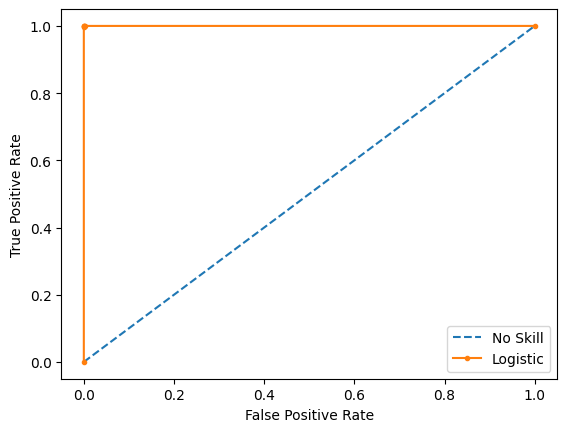

time: 48.6 s (started: 2024-04-17 09:55:58 +05:30)


In [55]:
# ROC curve for KNN Classifier


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probability1 = [0 for _ in range(len(Y_test_dataframe))]

probability2 = KNeighbors_Classifier.predict_proba(X_test_dataframe)
probability2 = probability2[:, 1]

auc1 = roc_auc_score(Y_test_dataframe, probability1)
auc2 = roc_auc_score(Y_test_dataframe, probability2)

print('No Skill: ROC AUC=%.3f' % (auc1))
print('Logistic: ROC AUC=%.3f' % (auc2))

f_probability_1, t_probability_1, _ = roc_curve(Y_test_dataframe, probability1)
f_probability_2, t_probability_2, _ = roc_curve(Y_test_dataframe, probability2)

pyplot.plot(f_probability_1, t_probability_1, linestyle='--', label='No Skill')
pyplot.plot(f_probability_2, t_probability_2, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()


# Evaluating and Testing Models 


============================== Normal_DoS Random  Forest  Classifier   Model Evaluation ==============================

Model Accuracy:
 0.9999480272634127

Confusion matrix:

 [[67342     1]
 [    6 67337]]



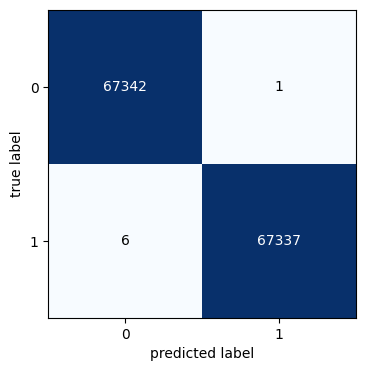


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS RFC and K-Neighbor Classifier Model Evaluation ==============================

Model Accuracy:
 0.9999183285567913

Confusion matrix:

 [[67339     4]
 [    7 67336]]



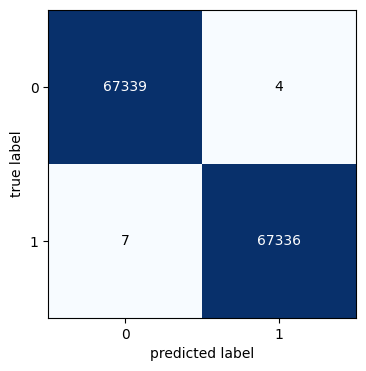


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS RFC & Naive Baye Classifier Model Evaluation ==============================

Model Accuracy:
 0.9981735295427884

Confusion matrix:

 [[67188   155]
 [   91 67252]]



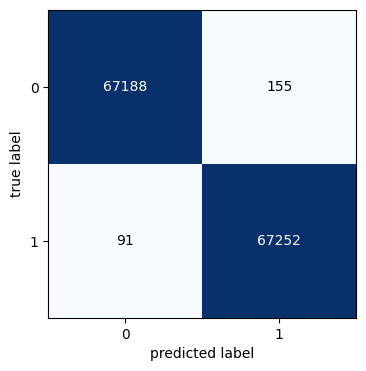


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS K-Nearest Neighbor Classifier Model Evaluation ==============================

Model Accuracy:
 0.9992723816877775

Confusion matrix:

 [[67303    40]
 [   58 67285]]



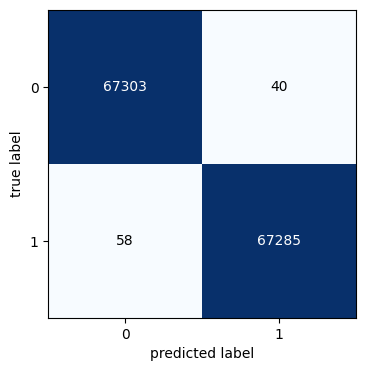


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS Logistic Generalized Additive Model Evaluation ==============================

Model Accuracy:
 0.9844750011137015

Confusion matrix:

 [[65811  1532]
 [  559 66784]]



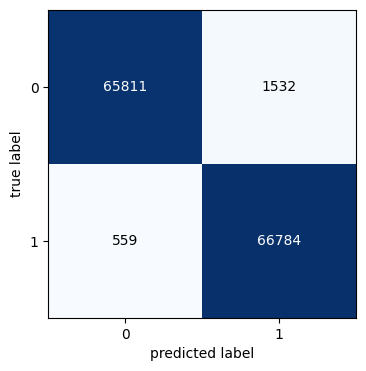


Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     67343
         1.0       0.98      0.99      0.98     67343

    accuracy                           0.98    134686
   macro avg       0.98      0.98      0.98    134686
weighted avg       0.98      0.98      0.98    134686



============================== Normal_DoS Naive  Baye's  Classifier    Model Evaluation ==============================

Model Accuracy:
 0.9679179721723119

Confusion matrix:

 [[64300  3043]
 [ 1278 66065]]



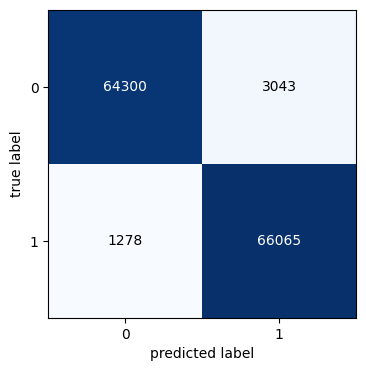


Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     67343
         1.0       0.96      0.98      0.97     67343

    accuracy                           0.97    134686
   macro avg       0.97      0.97      0.97    134686
weighted avg       0.97      0.97      0.97    134686


time: 6min 8s (started: 2024-04-17 09:57:31 +05:30)


In [56]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

classifier = []

classifier.append(('Random  Forest  Classifier  ', Random_Forest_Classifier))
classifier.append(('RFC and K-Neighbor Classifier', model_1))
classifier.append(("RFC & Naive Baye Classifier", model_2))
classifier.append(('K-Nearest Neighbor Classifier', KNeighbors_Classifier))
# classifier.append(('Support V-Machine Classifier', Support_vector_Classifier))
classifier.append(('Logistic Generalized Additive', Logistic_gam))
classifier.append(("Naive  Baye's  Classifier   ", Naive_Baye_Classifier))


for i, v in classifier:

    Accuracy = metrics.accuracy_score(Y_train_dataframe, v.predict(X_train_dataframe))
    Confusion_matrix = metrics.confusion_matrix(Y_train_dataframe, v.predict(X_train_dataframe))
    classification = metrics.classification_report(Y_train_dataframe, v.predict(X_train_dataframe))
    
    print()
    print('============================== {} {} Model Evaluation =============================='.format(group_class, i))
    print()
    print ("Model Accuracy:" "\n", Accuracy)
    print()
    print("Confusion matrix:\n" "\n", Confusion_matrix)
    print()
    fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(4, 4))
    plt.show()
    print()
    print("Classification report:" "\n", classification) 
    print()

In [57]:
print()
print('=================================== Model Test Results ===================================')
print('|                                           |                                             |')
print('|            MODELS                         |               ACCURACY                      |')
print('|          ----------                       |              ------------                   |')

for i, v in classifier:
    Accuracy = metrics.accuracy_score(Y_test_dataframe, v.predict(X_test_dataframe))
       
    print('|                                           |                                             |')
    print('|    {} Model                '.format(i), Accuracy,'                                      ')    
    print('|                                           |                                             |')
   
print('==========================================================================================')


=================================== Model Test Results ===================================
|                                           |                                             |
|            MODELS                         |               ACCURACY                      |
|          ----------                       |              ------------                   |
|                                           |                                             |
|    Random  Forest  Classifier   Model                 0.9999480272634127                                       
|                                           |                                             |
|                                           |                                             |
|    RFC and K-Neighbor Classifier Model                 0.9999183285567913                                       
|                                           |                                             |
|                                  

In [63]:
result = pd.DataFrame({'MODEL':['Random Forest Classifier Model','RFC and KNN Combined Model','RFC and Naive Bayes Combined Model','K-Nearest Neighbor Classifier Model','Logistic Generalized Additive Model','Naive Bayes Classifier Model'],
                   'Accuracy':[0.9999480272634127*100,0.9999257532334467*100,0.9984036945191037*100,0.9977577476500898*100,0.9844750011137015*100,0.9737686173767133*100],
                   'Training Time':['12.5 s','19.3 s','12.5 s','3.35 s','19min 36s','183 ms']})

result

MODEL   Accuracy Training Time
0       Random Forest Classifier Model  99.994803        12.5 s
1           RFC and KNN Combined Model  99.992575        19.3 s
2   RFC and Naive Bayes Combined Model  99.840369        12.5 s
3  K-Nearest Neighbor Classifier Model  99.775775        3.35 s
4  Logistic Generalized Additive Model  98.447500     19min 36s
5         Naive Bayes Classifier Model  97.376862        183 ms

time: 16 ms (started: 2024-04-17 10:17:36 +05:30)


In [60]:
!pip install openpyxl

^C
time: 2 s (started: 2024-04-17 10:14:56 +05:30)


In [61]:
import openpyxl

time: 281 ms (started: 2024-04-17 10:15:02 +05:30)


   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ------------------- -------------------- 122.9/250.0 kB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 3.8 MB/s eta 0:00:00


In [62]:
excel_writer = pd.ExcelWriter('Result.xlsx')
result.to_excel(excel_writer)
# excel_writer.save()

time: 31 ms (started: 2024-04-17 10:15:09 +05:30)


In [9]:
# from google.colab import files
# files.download('result.xlsx')